In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
from matplotlib import rcParams
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True

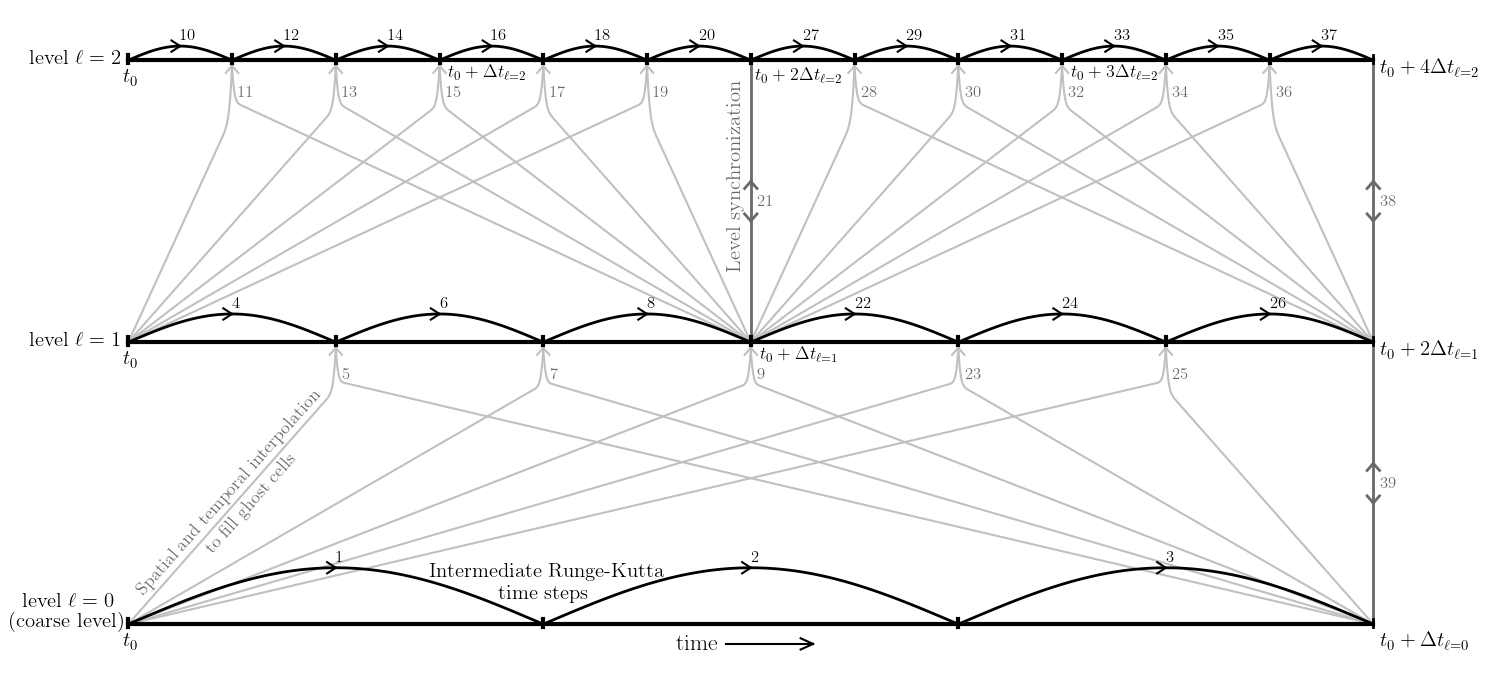

In [2]:
fig, ax = plt.subplots(figsize=(15,7))

fs = 12
################################### ghost
def Delta(x,x0,sigma):
    return np.exp(-(x-x0)**2/sigma**2)
    
def Line(x0,x1,lev,n):
    col = 'silver'
    N = 5000
    x = np.linspace(x0,x1,N)
    miss = 0.87
    y = (x-x1)/(x1-x0)*miss + lev - (1-miss)
    y += Delta(x,x1,0.005)
    below = 0.02
    locs = np.where(y < lev - below)
    x2 = np.linspace(x0,x1,len(locs[0]))
    plt.plot(x2,y[locs], color=col)
    if (x1 > x0):
        plt.plot([x1,x1-0.005],[lev-below,lev-below-0.025], color=col)
        plt.plot([x1,x1+0.005],[lev-below,lev-below-0.025], color=col)
        plt.text(x1+0.005, lev-below-0.11, r'$'+str(n)+'$', color='dimgrey', fontsize=fs)

lev = 1
N = 6
c = 0
numbers = np.array([5,7,9,23,25])
for s in range(1,N):
    Line(0,s/N,lev,numbers[c]) 
    Line(1,s/N,lev,numbers[c])
    c = c+1
    
lev = 2
N = 12
c = 0
numbers = np.array([11,13,15,17,19,21])
for s in range(1,N//2):
    Line(0,s/N,lev,numbers[c]) 
    Line(0.5,s/N,lev,numbers[c])
    c = c+1
    
c = 0
numbers = np.array([28,30,32,34,36,38])
for s in range(N//2+1,N):
    Line(0.5,s/N,lev,numbers[c]) 
    Line(1,s/N,lev,numbers[c]) 
    c = c+1

################################### avg down  
col = 'dimgrey'

dx = 0.005
dy = 0.025
gap = 0.07

# vertical
plt.plot([1,1],[0,2], color=col, linewidth=2)
plt.plot([.5,.5],[1,2], color=col, linewidth=2)     
  
# arrows    
def arrows(x,y,n):
    plt.plot([x,x-dx],[y+gap,y-dy+gap], color=col, linewidth=2)   
    plt.plot([x,x+dx],[y+gap,y-dy+gap], color=col, linewidth=2)  
    plt.plot([x,x-dx],[y-gap,y+dy-gap], color=col, linewidth=2)   
    plt.plot([x,x+dx],[y-gap,y+dy-gap], color=col, linewidth=2) 
    plt.text(x+dx, y-gap/4, r'$'+str(n)+'$', color=col, fontsize=fs)
arrows(1,0.5,39)
arrows(1,1.5,38)
arrows(0.5,1.5,21)
    
################################### advance  
def arch(x0,x1,lev,n):
    h = 0.2 / 2**lev
    N = 100
    x = np.linspace(x0,x1,N) 
    xy = np.linspace(0,np.pi,N)
    y = np.sin(xy) * h + lev
    plt.plot(x, y, color='black', linewidth=2)
    cent = (x1+x0)/2
    plt.text(cent, lev+h+0.02, r'$'+str(n)+'$', fontsize=fs)
    plt.plot([cent,cent-0.007], [lev+h,lev+h+0.02], color='black')
    plt.plot([cent,cent-0.007], [lev+h,lev+h-0.02], color='black')
    plt.plot([x1,x1],[lev-0.01,lev+0.02], linewidth=2, color='black')
    plt.plot([x0,x0],[lev-0.01,lev+0.02], linewidth=3, color='black')

numbers = np.array([1,2,3,4,6,8,22,24,26,10,12,14,16,18,20,27,29,31,33,35,37])
c = 0
for lev in range(3):
    N = 3 * 2**lev
    for s in range(N):        
        arch(s/N,(s+1)/N,lev,numbers[c])
        c = c + 1
        
################################### level  
plt.plot([0,1],[0,0], color='black', linewidth=3)
plt.plot([0,1],[1,1], color='black', linewidth=3)
plt.plot([0,1],[2,2], color='black', linewidth=3)

################################### text
fs = 15
plt.text(-0.085, 0.06, r'level $\ell=0$', fontsize=fs) 
plt.text(-0.085-0.01, 0.06 - 0.07, r'(coarse level)', fontsize=fs)  

plt.text(-0.08, -0.015+1, r'level $\ell=1$', fontsize=fs) 
plt.text(-0.08, -0.015+2, r'level $\ell=2$', fontsize=fs) 

plt.text(-0.004, -0.08, r'$t_0$', fontsize=fs) 
plt.text(-0.004, -0.08+1, r'$t_0$', fontsize=fs) 
plt.text(-0.004, -0.08+2, r'$t_0$', fontsize=fs) 

plt.text(1.005, -0.08, r'$t_0 + \Delta t_{\ell=0}$', fontsize=fs) 
plt.text(1.005, -0.05+1, r'$t_0 + 2\Delta t_{\ell=1}$', fontsize=fs) 
plt.text(1.005, -0.05+2, r'$t_0 + 4\Delta t_{\ell=2}$', fontsize=fs) 

plt.text(0.507, -0.06+1, r'$t_0 + \Delta t_{\ell=1}$', fontsize=fs-2) 

plt.text(0.257, -0.06+2, r'$t_0 + \Delta t_{\ell=2}$', fontsize=fs-2) 
plt.text(0.503, -0.07+2, r'$t_0 + 2\Delta t_{\ell=2}$', fontsize=fs-2) 
plt.text(0.757, -0.06+2, r'$t_0 + 3\Delta t_{\ell=2}$', fontsize=fs-2) 
    
    
plt.text(0.575-0.33333, 0.166, r'Intermediate Runge-Kutta', fontsize=fs)    
plt.text(0.63-0.33333, 0.09, r'time steps', fontsize=fs) 
    
plt.text(0.005, 0.1, r'Spatial and temporal interpolation', fontsize=fs-2, color='dimgrey', rotation=48.5)    
plt.text(0.06, 0.25, r'to fill ghost cells', fontsize=fs-2, color='dimgrey', rotation=48.5) 
plt.text(0.48, 1.26, r'Level synchronization', fontsize=fs, color='dimgrey', rotation=90) 
    
################################### time

x1=0.55
dx=0.01
dy=0.02
plt.plot([0.48,x1],[-0.07,-0.07], color='black')
plt.plot([x1,x1-dx],[-0.07,-0.07+dy], color='black')
plt.plot([x1,x1-dx],[-0.07,-0.07-dy], color='black')
plt.text(0.44, -0.09, r'time', fontsize=fs+2)

###################################  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.tight_layout()
plt.savefig('../assets/temporal_evolution.pdf')

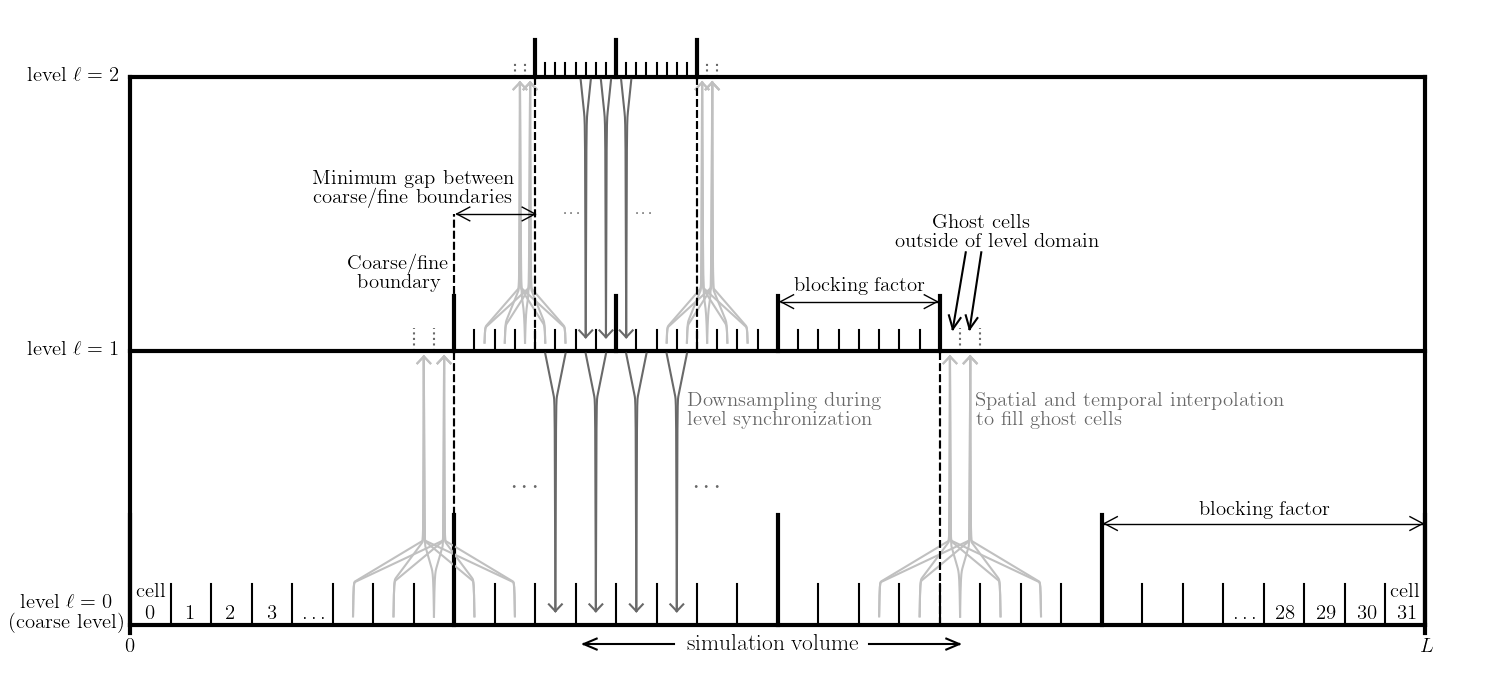

In [3]:
fig, ax = plt.subplots(figsize=(15,7))

fs = 12

################################### C/F boundary
x0_l1 = 2/8
x1_l1 = 5/8
x0_l2 = 5/16
x1_l2 = 7/16

plt.plot([x0_l1,x0_l1],[0,1.5], linestyle='--', color='black')
plt.plot([x1_l1,x1_l1],[0,1], linestyle='--', color='black')

plt.plot([x0_l2,x0_l2],[2,1], linestyle='--', color='black')
plt.plot([x1_l2,x1_l2],[2,1], linestyle='--', color='black')

################################### cells
def cells(N,x0,x1,lev):
    s1 = 0.15 / (lev+1)
    s2 = 0.4 / (lev+1)
    for i in np.linspace(0,1,N+1):
        if i >= x0 and i <= x1: 
            plt.plot([i,i],[lev,lev+s1], color='black')

    for i in np.linspace(0,1,N//8+1):
        if i >= x0 and i <= x1:
            plt.plot([i,i],[lev,lev+s2], color='black', linewidth=3)
    
N0 = 32
cells(N0,0,1,0)
cells(N0*2,x0_l1,x1_l1,1)
cells(N0*4,x0_l2,x1_l2,2)

################################### ghosts

def Delta(x,x0,sigma):
    return np.exp(-(x-x0)**2/sigma**2)
    
'''
def Line(x0,x1,lev):
    col = 'silver'
    N = 5000
    x = np.linspace(x0,x1,N)
    miss = 0.8
    y = (x-x1)/(x1-x0)*miss + lev - (1-miss) + 0.1
    y += Delta(x,x1,0.002)
    y -= Delta(x,x0,0.001)
    below = 0.02
    locs = np.where((y < lev - below) & (y > lev-0.97))
    x2 = np.linspace(x0,x1,len(locs[0]))
    plt.plot(x2,y[locs], color=col)
    if (x1 > x0):
        plt.plot([x1,x1-0.005],[lev-below,lev-below-0.025], color=col)
        plt.plot([x1,x1+0.005],[lev-below,lev-below-0.025], color=col)
'''

def Line(x0,x1,lev):
    col = 'silver'
    N = 5000
    x = np.linspace(x0,x1,N)
    miss = 0.16
    y = (x-x1)/(x1-x0)*miss + lev - (1-miss) + 0.15/lev
    y += Delta(x,x1,0.0005)
    y -= Delta(x,x0,0.001)
    below = 0.02
    locs = np.where((y < lev - below) & (y > lev-0.97))
    x2 = np.linspace(x0,x1,len(locs[0]))
    plt.plot(x2,y[locs], color=col)
    if (x1 > x0):
        plt.plot([x1,x1-0.005],[lev-below,lev-below-0.025], color=col)
        plt.plot([x1,x1+0.005],[lev-below,lev-below-0.025], color=col)


lev = 1
s1 = 0.17 / (lev+1)
dx = 1/(N0*2)
i = x1_l1 + dx
plt.plot([i,i],[lev,lev+s1], color='dimgray', linestyle=':')
Line(i,i-dx/2,lev)
Line(i+2*dx,i-dx/2,lev)
Line(i+4*dx,i-dx/2,lev)
Line(i-2*dx,i-dx/2,lev)
Line(i-4*dx,i-dx/2,lev)


i = x1_l1 + 2*dx
plt.plot([i,i],[lev,lev+s1], color='dimgray', linestyle=':')
Line(i-dx,i-dx/2,lev)
Line(i+1*dx,i-dx/2,lev)
Line(i+3*dx,i-dx/2,lev)
Line(i-3*dx,i-dx/2,lev)
Line(i-5*dx,i-dx/2,lev)

i = x0_l1 - dx
plt.plot([i,i],[lev,lev+s1], color='dimgray', linestyle=':')

Line(i,i-dx/2,lev)
Line(i+2*dx,i-dx/2,lev)
Line(i+4*dx,i-dx/2,lev)
Line(i-2*dx,i-dx/2,lev)
Line(i-4*dx,i-dx/2,lev)

i = x0_l1 - 2*dx
plt.plot([i,i],[lev,lev+s1], color='dimgray', linestyle=':')
i = x0_l1

Line(i-dx,i-dx/2,lev)
Line(i+1*dx,i-dx/2,lev)
Line(i+3*dx,i-dx/2,lev)
Line(i-3*dx,i-dx/2,lev)
Line(i-5*dx,i-dx/2,lev)

lev = 2
s1 = 0.17 / (lev+1)
dx = 1/(N0*4)
i = x1_l2 + 1*dx
plt.plot([i,i],[lev,lev+s1], color='dimgray', linestyle=':')
i = x0_l2

Line(i-dx,i-dx/2,lev)
Line(i+1*dx,i-dx/2,lev)
Line(i+3*dx,i-dx/2,lev)
Line(i-3*dx,i-dx/2,lev)
Line(i-5*dx,i-dx/2,lev)


i = x1_l2 + 2*dx
plt.plot([i,i],[lev,lev+s1], color='dimgray', linestyle=':')
i = x0_l2 - dx

Line(i,i-dx/2,lev)
Line(i+2*dx,i-dx/2,lev)
Line(i+4*dx,i-dx/2,lev)
Line(i-2*dx,i-dx/2,lev)
Line(i-4*dx,i-dx/2,lev)


i = x0_l2 - 1/(N0*4)
plt.plot([i,i],[lev,lev+s1], color='dimgray', linestyle=':')
i = x1_l2 + dx
Line(i,i-dx/2,lev)
Line(i+2*dx,i-dx/2,lev)
Line(i+4*dx,i-dx/2,lev)
Line(i-2*dx,i-dx/2,lev)
Line(i-4*dx,i-dx/2,lev)

i = x0_l2 - 2/(N0*4)
plt.plot([i,i],[lev,lev+s1], color='dimgray', linestyle=':')
i = x1_l2 + 2*dx
Line(i-dx,i-dx/2,lev)
Line(i+1*dx,i-dx/2,lev)
Line(i+3*dx,i-dx/2,lev)
Line(i-3*dx,i-dx/2,lev)
Line(i-5*dx,i-dx/2,lev)

################################### C/F boundary
x0_l1 = 2/8
x1_l1 = 5/8
x0_l2 = 5/16
x1_l2 = 7/16

plt.plot([x0_l1,x0_l1],[0,1.5], linestyle='--', color='black')
plt.plot([x1_l1,x1_l1],[0,1], linestyle='--', color='black')

plt.plot([x0_l2,x0_l2],[2,1], linestyle='--', color='black')
plt.plot([x1_l2,x1_l2],[2,1], linestyle='--', color='black')

################################### level  
plt.plot([0,1],[0,0], color='black', linewidth=3)
plt.plot([0,1],[1,1], color='black', linewidth=3)
plt.plot([0,1],[2,2], color='black', linewidth=3)

plt.plot([0,0],[-0.03,2], color='black', linewidth=3)
plt.plot([1,1],[-0.03,2], color='black', linewidth=3)

################################### bf
h = 0.37
x0 = 0.752
x1 = 0.998
dx=0.01
dy=0.025
lw = 1
plt.plot([x0,x1],[h,h], color='black', linewidth=lw)
plt.plot([x0,x0+dx],[h,h+dy], color='black', linewidth=lw)
plt.plot([x0,x0+dx],[h,h-dy], color='black', linewidth=lw)
plt.plot([x1,x1-dx],[h,h+dy], color='black', linewidth=lw)
plt.plot([x1,x1-dx],[h,h-dy], color='black', linewidth=lw)


h = 1.18
x0 = 0.502
x1 = x1_l1-0.002
dx=0.01
dy=0.025
lw = 1
plt.plot([x0,x1],[h,h], color='black', linewidth=lw)
plt.plot([x0,x0+dx],[h,h+dy], color='black', linewidth=lw)
plt.plot([x0,x0+dx],[h,h-dy], color='black', linewidth=lw)
plt.plot([x1,x1-dx],[h,h+dy], color='black', linewidth=lw)
plt.plot([x1,x1-dx],[h,h-dy], color='black', linewidth=lw)

################################### cf gap
h = 1.5
x0 = 0.252
x1 = x0_l2-0.0
dx=0.01
dy=0.025
lw = 1
plt.plot([x0,x1],[h,h], color='black', linewidth=lw)
plt.plot([x0,x0+dx],[h,h+dy], color='black', linewidth=lw)
plt.plot([x0,x0+dx],[h,h-dy], color='black', linewidth=lw)
plt.plot([x1,x1-dx],[h,h+dy], color='black', linewidth=lw)
plt.plot([x1,x1-dx],[h,h-dy], color='black', linewidth=lw)

################################### ghost arrow

x = x1_l1+0.01
y = 1.08
dx = 0.003
dx2 = dx * 2
dy = 0.05
dy2 = dy * 0.8
plt.plot([x,x1_l1+0.02],[y,1.36], color='black')
plt.plot([x,x+dx2],[y,y+dy2], color='black')
plt.plot([x,x-dx],[y,y+dy], color='black')

x = x1_l1+0.023
plt.plot([x,x1_l1+0.032],[y, 1.36], color='black')
plt.plot([x,x+dx2],[y,y+dy2], color='black')
plt.plot([x,x-dx],[y,y+dy], color='black')

################################### downsampling
'''
def LineDown(x0,x1,lev):
    col = 'silver'
    N = 5000
    x = np.linspace(x0,x1,N)
    miss = 0.8
    y = (x-x1)/(x1-x0)*miss + lev - (1-miss) + 0.15/lev
    y += Delta(x,x1,0.002)
    y -= Delta(x,x0,0.001)
    below = 0.02
    locs = np.where((y < lev -0.01) & (y > lev-0.95))
    x2 = np.linspace(x0,x1,len(locs[0]))
    plt.plot(x2,y[locs], color=col)
    if (x1 > x0):
        plt.plot([x0,x0-0.005],[lev-0.95,lev-0.95+0.025], color=col)
        plt.plot([x0,x0+0.005],[lev-0.95,lev-0.95+0.025], color=col)
'''

def LineDown(x0,x1,lev):
    col = 'dimgray'
    N = 5000
    x = np.linspace(x0,x1,N)
    miss = 0.95
    y = (x-x1)/(x1-x0)*miss + lev - (1-miss) + 0.8
    y += Delta(x,x1,0.0001)
    y -= Delta(x,x0,0.0001)
    below = 0.02
    locs = np.where((y < lev -0.01) & (y > lev-0.95))
    x2 = np.linspace(x0,x1,len(locs[0]))
    plt.plot(x2,y[locs], color=col)
    if (x1 > x0):
        plt.plot([x0,x0-0.005],[lev-0.95,lev-0.95+0.025], color=col)
        plt.plot([x0,x0+0.005],[lev-0.95,lev-0.95+0.025], color=col)

dx0 = 1/(N0*1)
dx1 = 1/(N0*2)
dx2 = 1/(N0*4)
LineDown(10.5*dx0,20.5*dx1,1)
LineDown(10.5*dx0,21.5*dx1,1)

LineDown(11.5*dx0,22.5*dx1,1)
LineDown(11.5*dx0,23.5*dx1,1)

LineDown(12.5*dx0,24.5*dx1,1)
LineDown(12.5*dx0,25.5*dx1,1)

LineDown(13.5*dx0,26.5*dx1,1)
LineDown(13.5*dx0,27.5*dx1,1)

LineDown(22.5*dx1,44.5*dx2,2)
LineDown(22.5*dx1,45.5*dx2,2)
LineDown(23.5*dx1,46.5*dx2,2)
LineDown(23.5*dx1,47.5*dx2,2)
LineDown(24.5*dx1,48.5*dx2,2)
LineDown(24.5*dx1,49.5*dx2,2)
        
################################### text
fs = 15
plt.text(-0.085, 0.06, r'level $\ell=0$', fontsize=fs) 
plt.text(-0.085-0.008, 0.06 - 0.07, r'(coarse level)', fontsize=fs)  

plt.text(-0.08, -0.015+1, r'level $\ell=1$', fontsize=fs) 
plt.text(-0.08, -0.015+2, r'level $\ell=2$', fontsize=fs) 

plt.text(-0.004, -0.1, r'$0$', fontsize=fs) 
plt.text(-0.004+1, -0.1, r'$L$', fontsize=fs) 

plt.text(0.825, 0.4, r'blocking factor', fontsize=fs) 
plt.text(0.512, 1.22, r'blocking factor', fontsize=fs) 

t = plt.text(0.168, 1.3, r'Coarse/fine', fontsize=fs, color='black') 
t = plt.text(0.175, 1.3-0.07, r'boundary', fontsize=fs, color='black')

plt.text(0.140, 1.61, r'Minimum gap between', fontsize=fs, color='black') 
plt.text(0.141, 1.61-0.07, r'coarse/fine boundaries', fontsize=fs, color='black') 

plt.text(0.653, 0.8, r'Spatial and temporal interpolation', fontsize=fs, color='dimgrey') 
plt.text(0.653, 0.8-0.07, r'to fill ghost cells', fontsize=fs, color='dimgrey') 

#plt.text(0.46, 1.65, r'Spatial and temporal interpolation', fontsize=fs, color='dimgrey') 
#plt.text(0.47, 1.65-0.07, r'to fill ghost cells', fontsize=fs, color='dimgrey') 

plt.text(0.62, 1.45, r'Ghost cells', fontsize=fs, color='black') 
plt.text(0.59, 1.45-0.07, r'outside of level domain', fontsize=fs, color='black') 

plt.text(0.43, 0.8, r'Downsampling during', fontsize=fs, color='dimgrey') 
plt.text(0.43, 0.8-0.07, r'level synchronization', fontsize=fs, color='dimgrey')

plt.text(0.435, 0.5, r'\textbf{\dots}', fontsize=fs, color='dimgray') 
plt.text(0.295, 0.5, r'\textbf{\dots}', fontsize=fs, color='dimgray')
plt.text(0.39, 1.5, r'\textbf{\dots}', fontsize=fs-6, color='dimgray') 
plt.text(0.335, 1.5, r'\textbf{\dots}', fontsize=fs-6, color='dimgray')

plt.text(0.004, 0.1, r'cell', fontsize=fs) 
plt.text(1-1/32+0.004, 0.1, r'cell', fontsize=fs) 
plt.text(0.5/32-0.004, 0.02, r'0', fontsize=fs) 
plt.text(1.5/32-0.004, 0.02, r'1', fontsize=fs) 
plt.text(2.5/32-0.004, 0.02, r'2', fontsize=fs) 
plt.text(3.5/32-0.004, 0.02, r'3', fontsize=fs) 
plt.text(4.5/32-0.007, 0.02, r'\dots', fontsize=fs) 
plt.text(27.5/32-0.007, 0.02, r'\dots', fontsize=fs) 
plt.text(28.5/32-0.006, 0.02, r'28', fontsize=fs) 
plt.text(29.5/32-0.006, 0.02, r'29', fontsize=fs) 
plt.text(30.5/32-0.006, 0.02, r'30', fontsize=fs) 
plt.text(31.5/32-0.006, 0.02, r'31', fontsize=fs) 

################################### volume

x1=0.64
dx=0.01
dy=0.02
plt.plot([0.57,x1],[-0.07,-0.07], color='black')
plt.plot([x1,x1-dx],[-0.07,-0.07+dy], color='black')
plt.plot([x1,x1-dx],[-0.07,-0.07-dy], color='black')
x1 = 0.35
plt.plot([0.42,x1],[-0.07,-0.07], color='black')
plt.plot([x1,x1+dx],[-0.07,-0.07+dy], color='black')
plt.plot([x1,x1+dx],[-0.07,-0.07-dy], color='black')
plt.text(0.43, -0.09, r'simulation volume', fontsize=fs+2)
    
###################################  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.tight_layout()
plt.savefig('../assets/spatial_evolution.pdf')